In [8]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=2, suppress=True)

## random textures

1.618 11
(6, 1024, 1)


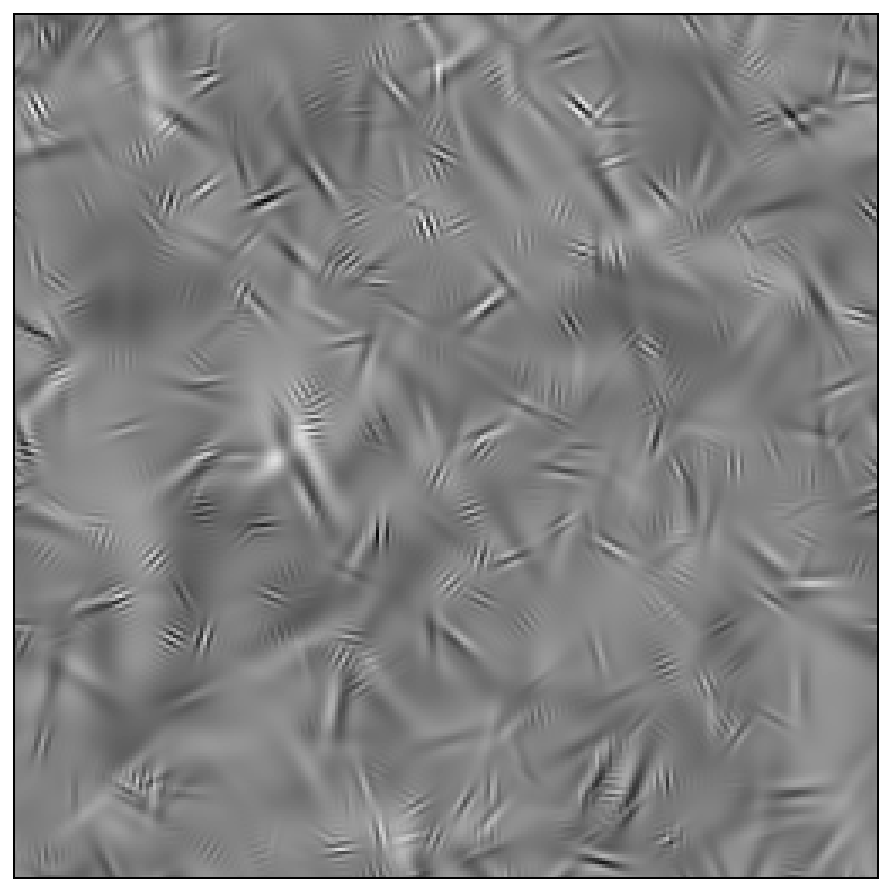

In [9]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')

mp.pe.N = 1024

mp.pe.N_image = 1
print( mp.pe.base_levels, mp.n_levels)
edgeslist = np.zeros((6, mp.pe.N, mp.pe.N_image))
edgeslist[0, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[1, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[2, :, :] = (np.pi* np.random.rand(mp.pe.N, mp.pe.N_image) ) % np.pi
#edgeslist[3, :, :] =  mp.sf_0[np.random.randint(mp.sf_0.size, size=(pe.N, pe.N_image))] # best would be to have more high frequency components
edgeslist[3, :, :] =  np.ceil(mp.pe.base_levels**(mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))/mp.pe.base_levels**(mp.n_levels)
edgeslist[4, :, :] = np.random.randn(mp.pe.N, mp.pe.N_image)
edgeslist[5, :, :] = 2*np.pi*np.random.rand(mp.pe.N, mp.pe.N_image)
print (edgeslist.shape)
image_rec = mp.reconstruct(edgeslist[:,:,0])
image_rec /= image_rec.std()
fig, a = mp.show_edges(np.empty((6,0)), image=image_rec, color='toto', show_phase=False) #

In [10]:
fig, a = mp.show_edges(edgeslist[:,:,0], image=image_rec, color='toto', show_phase=False) #
print image_rec.min(), image_rec.max()

SyntaxError: invalid syntax (<ipython-input-10-d9dea846508a>, line 2)

In [ ]:
print mp.sf_0
print mp.n_levels
scales = 0.5 * (1- mp.pe.base_levels**(-mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))#/mp.pe.base_levels**(mp.n_levels)
plt.hist(scales)

In [ ]:
mp.sf_0[np.random.randint(mp.sf_0.size, size=(4, 5))]

In [ ]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

mp.pe.N = 1024

mp.pe.N_image = 1
print mp.pe.base_levels, mp.n_levels
edgeslist = np.zeros((6, mp.pe.N, mp.pe.N_image))
edgeslist[0, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[1, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[2, :, :] = (np.pi* np.random.rand(mp.pe.N, mp.pe.N_image) ) % np.pi
#edgeslist[3, :, :] =  mp.sf_0[np.random.randint(mp.sf_0.size, size=(pe.N, pe.N_image))] # best would be to have more high frequency components
edgeslist[3, :, :] =  0.5 * (1- mp.pe.base_levels**(-mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))
edgeslist[4, :, :] = np.random.randn(mp.pe.N, mp.pe.N_image)
edgeslist[5, :, :] = 2*np.pi*np.random.rand(mp.pe.N, mp.pe.N_image)
print (edgeslist.shape)
image_rec = mp.reconstruct(edgeslist[:,:,0])
image_rec /= image_rec.std()
fig, a = mp.show_edges(edgeslist[:,:,0], image=image_rec, color='toto', show_phase=False) #
print image_rec.min(), image_rec.max()

## bonus: generating an unique seed for a given filename

In [ ]:
imagelist, edgeslist, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_distractors')
#print imagelist
# take one instance:
filename, croparea  = imagelist[0]
print (filename,croparea, filename+str(croparea))
import os
import hashlib
str_ = filename+str(croparea)
hashlib.sha224(str_).hexdigest()

In [ ]:
int("0x" +  hashlib.sha224(filename+str(croparea)).hexdigest(), 0)

In [ ]:
np.random.seed(seed=int("0x" +  hashlib.sha224(filename+str(croparea)).hexdigest(), 0) % 4294967295)

In [ ]:
%cd ..